# Introduction to data science 

Main topics:
1. normal distribution 
2. skewed distribution 
3. data relationships

Based and inspired from the course by Michael Szell and previous year course https://github.com/Big-data-course-CRI-in-2020/materials_big_data_cri_20120/tree/main/python%20resources


# Assignment for the notebook 
Run the notebook on the dataset and check with various parameters.

In [188]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import scipy.stats as stats
import pandas as pd
from scipy.optimize import curve_fit

# 1. Normal distribution

We investigate normal distribution.
We first look at data set: gender, height [inches], and weight [pounds] about individuals.

In [189]:
# Data set downloaded from: https://www.kaggle.com/mustafaali96/weight-height/downloads/weight-height.zip/1
# Ignore warnings "'head' is not recognized "
!head files/weightheight.csv


"Gender","Height","Weight"
0,73.847017017515,241.893563180437
0,68.7819040458903,162.310472521300
0,74.1101053917849,212.7408555565
0,71.7309784033377,220.042470303077
0,69.8817958611153,206.349800623871
0,67.2530156878065,152.212155757083
0,68.7850812516616,183.927888604031
0,68.3485155115879,167.971110489509
0,67.018949662883,175.92944039571


In [190]:
dataweightheight = np.loadtxt('files/weightheight.csv', skiprows=1, delimiter=',')

In [191]:
print(dataweightheight.shape)


(10000, 3)


In [192]:
# always PRINT your data and know WHAT each number may be

# Turn data metric
dataweightheight[:,1] *= 2.54
dataweightheight[:,2] *= 0.453592
dataweightheight[:10,:]

array([[  0.        , 187.57142322, 109.72098511],
       [  0.        , 174.70603628,  73.62273185],
       [  0.        , 188.2396677 ,  96.49755015],
       [  0.        , 182.19668514,  99.80950419],
       [  0.        , 177.49976149,  93.59861876],
       [  0.        , 170.82265985,  69.04221615],
       [  0.        , 174.71410638,  83.42821885],
       [  0.        , 173.6052294 ,  76.19035195],
       [  0.        , 170.22813214,  79.80018673],
       [  0.        , 161.17949471,  70.94164201]])

In [193]:
# turning data into dataframe using pandas 
# this may be useful on later stages 

df = pd.DataFrame(dataweightheight)
df.head()


,0,1,2
0,0.0,187.571423,109.720985
1,0.0,174.706036,73.622732
2,0.0,188.239668,96.497550
3,0.0,182.196685,99.809504
4,0.0,177.499761,93.598619


## Exploratory data analysis of quantitative variables
We print the data and make it easy to look at. 

Plotting histogram with **matplotlib** hist: 
If True, the first element of the return tuple will be the counts normalized to form a probability density: 

https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html 

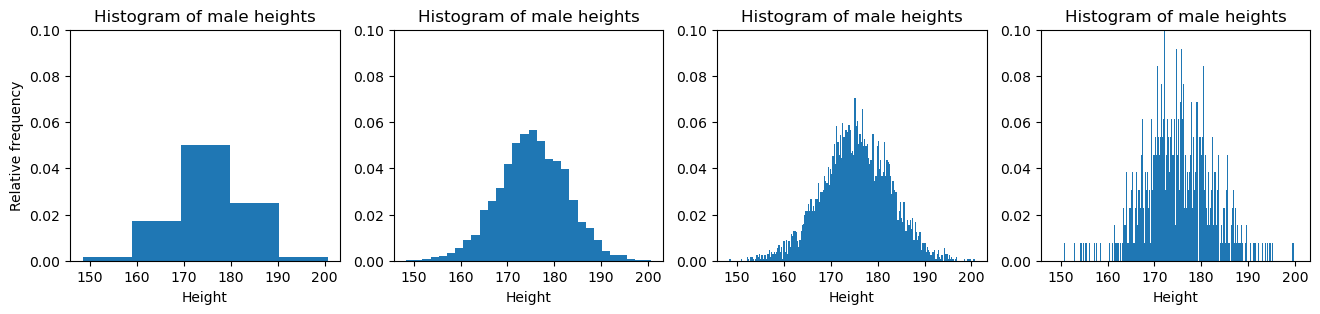

In [194]:
# we use DIFFERENT bins sizes for the same dataset of male height
bins = [5, 30, 200, 2000]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 3))

# we take only 0-column with male height 
maskmale = (dataweightheight[:,0] == 0)
for ax, i in zip(axes, range(4)): # print for each bins size
    ax.hist(dataweightheight[maskmale,1], bins[i], density=True);
    ax.set_ylim([0,0.1])
    ax.set_xlabel('Height')
    if i==0:
        ax.set_ylabel('Relative frequency')
    ax.set_title('Histogram of male heights');

Let us plot data in the histogram of male heights and fit to the normal distribution using standard **scipy** function from stats.norm: 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html


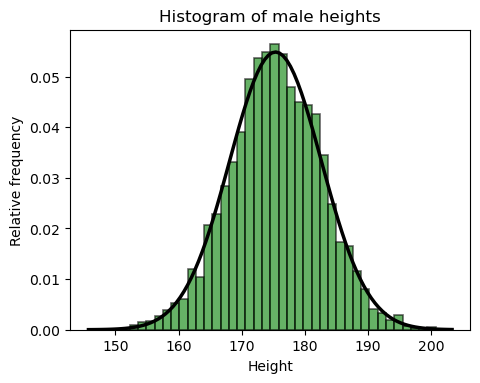

In [195]:
fig = plt.figure(figsize=(4, 3)) # create figure object with a (width,height)
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# Plot histogram of data
axes.hist(dataweightheight[maskmale,1], 40, density=True, alpha=0.6, color='g', edgecolor='black', linewidth=1.2);
axes.set_xlabel('Height')
axes.set_ylabel('Relative frequency')
axes.set_title('Histogram of male heights');

# Plot a normal distribution on top
import scipy.stats as stats
mu, sigma = stats.norm.fit(dataweightheight[maskmale,1])

xmin, xmax = axes.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
axes.plot(x, p, 'k', linewidth=2.5);

In [196]:
# Interactive version for different bins sizes
from ipywidgets import interact
import ipywidgets as widgets

def plot_func(bins):
    fig = plt.figure(figsize=(4, 3)) # create figure object with a (width,height)
    axes = fig.add_axes([0, 0, 1, 1])
    axes.hist(dataweightheight[maskmale,1], int(bins), density=True, alpha=0.6, color='g', edgecolor='black', linewidth=1);
    axes.set_ylim([0,0.06])
    axes.set_xlabel('Height')
    axes.set_ylabel('Relative frequency')
    axes.set_title('Histogram of male heights');
    axes.plot(x, p, 'k', linewidth=2.5);

interact(plot_func, bins = widgets.FloatSlider(value=3, min=3, max=40, step=1));

interactive(children=(FloatSlider(value=3.0, description='bins', max=40.0, min=3.0, step=1.0), Output()), _dom…

This normal distribution has two parameters: the mean mu and standard deviation sigma. They completely determine the shape of the whole curve.

In [197]:
mu, sigma
#mu corresponds to average height 
#sigma - to standard deviation 

(175.32691860179227, 7.272212730423626)

What is important for the distribution (to be real distribution)? 


In [198]:
# Interactive version
# !pip install ipywidgets
from ipywidgets import interact
import ipywidgets as widgets

def plot_func(sigma):
    fig = plt.figure(figsize=(4, 3)) # create figure object with a (width,height)
    axes = fig.add_axes([0, 0, 1, 1])
    p = stats.norm.pdf(x, mu, sigma)
    axes.plot(x, p, 'k', linewidth=2.5);
    axes.set_ylim([0,0.07])
    axes.set_xlim([x.min(),x.max()])
    axes.set_xlabel('Height')
    axes.set_ylabel('Relative frequency')
    axes.set_title('Model of male heights with different spreads');
    
interact(plot_func, sigma = widgets.FloatSlider(value=7, min=1, max=12, step=0.5));

interactive(children=(FloatSlider(value=7.0, description='sigma', max=12.0, min=1.0, step=0.5), Output()), _do…

Let's check if the male heights are normally distributed using Q-Q plot 
or 
“quantile-quantile” plot. 

We use standart **scipy** function and create Q-Q plot with 45-degree line added to plot.

Why 45 degrees? 
Because we compare two probability distributions by plotting their quantiles against each other and if the two distributions which we are comparing are exactly equal then the points on the Q-Q plot will perfectly lie on a straight line y = x.

In [199]:
# !pip install statsmodels
import statsmodels.api as sm  # For the Q-Q plot
import scipy.stats as stats  # For generating random data and for fitting

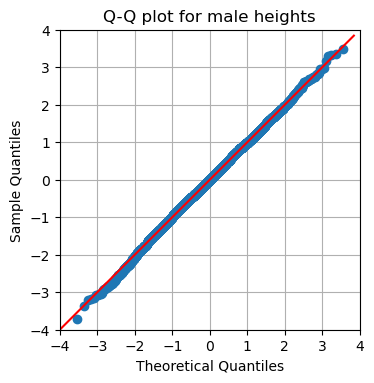

In [200]:
fig = plt.figure(figsize=(3, 3))
axes = fig.add_axes([0, 0, 1, 1])
sm.qqplot(dataweightheight[maskmale,1], stats.norm, fit=True, line='45',ax=axes)
# fit=True just means that the quantiles are formed from the standardized data

# Few commands to make the plot look nicer:
axes.set_ylim([-4,4]); 
axes.set_xlim([-4,4])
axes.set_xticks(axes.get_yticks()); axes.grid()
axes.set_title("Q-Q plot for male heights");

All the points lie on the straight line, so the normal distribution is a good assumption.

We can also synthetically generate other dataset from other distribution. 
We use Cauchy distribution, which takes a location (loc) and a scale (gamma) parameter. It exposes the rvs method to draw random samples.


In [201]:
np.random.seed(seed=6)
dataalienheights = stats.cauchy.rvs(loc=175, scale=6.7, size=514)
dataalienheights = dataalienheights[dataalienheights > 100]

print('mean alien height', dataalienheights.mean())
dataalienheights

mean alien height 183.06632514293574


array([ 194.14808047,  171.09367286,  185.64817238,  124.14543428,
        155.95119106,  177.0623888 ,  175.62945805,  173.25294963,
        171.18975683,  177.71425553,  173.68131689,  181.13055708,
        175.38004933,  176.6946823 ,  178.29156931,  393.09174254,
        185.54712207,  173.12632198,  191.35919982,  185.83836252,
        136.23296733,  180.49457693,  184.35525286,  181.15087237,
        180.16784299,  175.86644859,  158.79946409,  225.05762961,
        172.89856642,  166.74129245,  180.44681673,  543.13433621,
        168.53226443,  178.99966149,  177.15385211,  180.44878522,
        208.60015915,  171.63402424,  168.45126544,  172.88043169,
        181.55469744,  180.6885908 ,  172.96430814,  375.73958374,
        173.94959441,  172.19533928,  180.18454316,  149.7175381 ,
        172.78511117,  182.64219241,  182.35164185,  169.59275605,
        165.1106841 ,  174.39322023,  171.17297486,  181.08634407,
        165.08151617,  171.06893424,  187.58026323,  177.53229

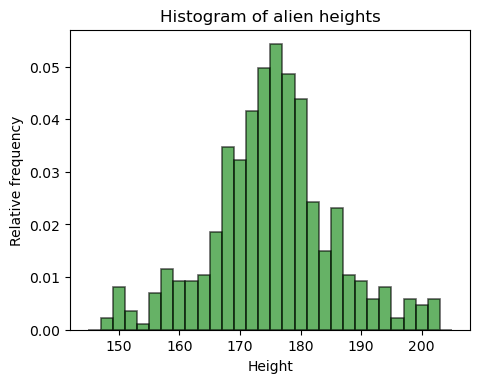

In [202]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1])

# Plot histogram of data
axes.hist(dataalienheights, 30, range=(145,205), density=True, alpha=0.6, color='g', edgecolor='black', linewidth=1.2);
axes.set_xlabel('Height')
axes.set_ylabel('Relative frequency')
axes.set_title('Histogram of alien heights');

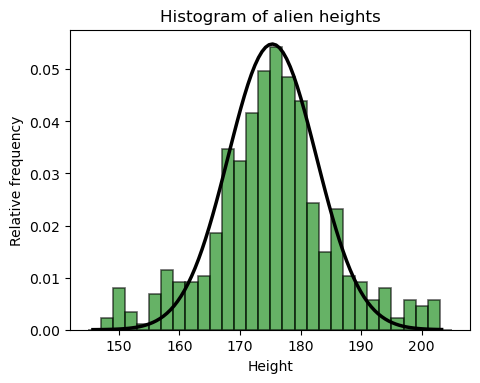

In [203]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1]) 

# Plot histogram of data
axes.hist(dataalienheights, 30, range=(145,205), density=True, alpha=0.6, color='g', edgecolor='black', linewidth=1.2);
axes.set_xlabel('Height')
axes.set_ylabel('Relative frequency')
axes.set_title('Histogram of alien heights');

# Plot a normal distribution on top
axes.plot(x, p, 'k', linewidth=2.5);

Hm, does it really fit? We can use q-q plot.


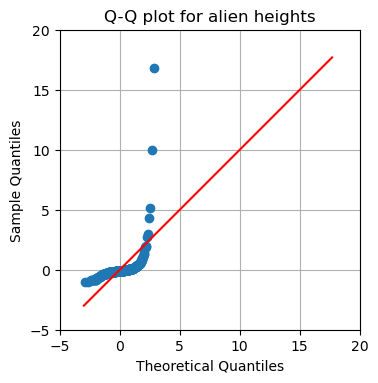

In [204]:
fig = plt.figure(figsize=(3, 3)) # create figure object with a (width,height)
axes = fig.add_axes([0, 0, 1, 1])
sm.qqplot(dataalienheights, stats.norm, fit=True, line='45',ax=axes);

# Few commands to make the plot look nicer:
axes.set_ylim([-5,20]); axes.set_xlim([-5,20])
axes.grid()
axes.set_title("Q-Q plot for alien heights");

But if we remove outliers (less than 250) we get better.

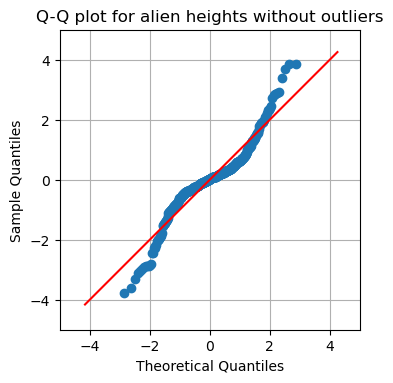

In [205]:
fig = plt.figure(figsize=(3, 3)) # create figure object with a (width,height)
axes = fig.add_axes([0, 0, 1, 1])
sm.qqplot(dataalienheights[dataalienheights<250], stats.norm, fit=True, line='45',ax=axes);

# Few commands to make the plot look nicer:
axes.set_ylim([-5,5]); axes.set_xlim([-5,5])
axes.grid()
axes.set_title("Q-Q plot for alien heights without outliers");

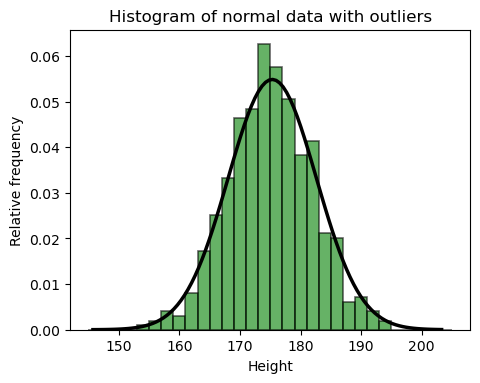

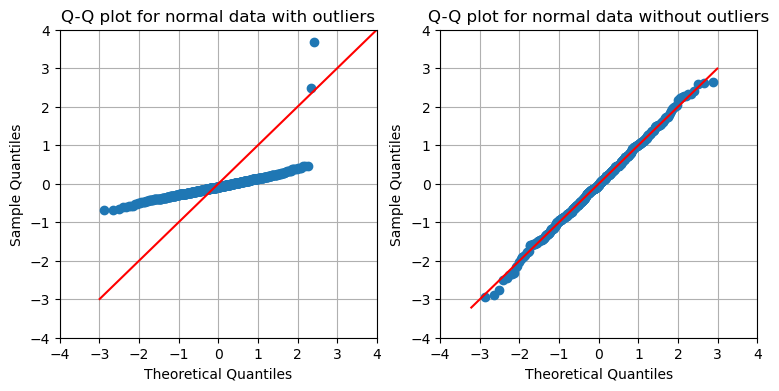

In [206]:
datanormalwithoutliers = np.append(np.random.normal(mu, sigma, 495), [260,300,400,600,700]);
fig = plt.figure(figsize=(4, 3)) # create figure object with a (width,height)
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# Plot histogram of data
axes.hist(datanormalwithoutliers, 30, range=(145,205), density=True, alpha=0.6, color='g', edgecolor='black', linewidth=1.2);
axes.set_xlabel('Height')
axes.set_ylabel('Relative frequency')
axes.set_title('Histogram of normal data with outliers');

# Plot a normal distribution on top
axes.plot(x, p, 'k', linewidth=2.5);

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

axes[0].set_title("Q-Q plot for normal data with outliers");
sm.qqplot(datanormalwithoutliers, stats.norm, fit=True, line='45',ax=axes[0]);

axes[1].set_title("Q-Q plot for normal data without outliers");
sm.qqplot(datanormalwithoutliers[datanormalwithoutliers < 230], stats.norm, fit=True, line='45',ax=axes[1]);

# Few commands to make the plot look nicer:
for ax in axes:
    ax.set_ylim([-4,4]); ax.set_xlim([-4,4])
    ax.set_xticks(ax.get_yticks()); ax.grid()

# 2. Skewed distribution 
Not every distribution is normal.
Give examples of any non normal distribution? 

Let us for example take fake data that somewhat models of such distributions. 


# Source
This notebook was adapted from:
* James Bagrow: http://bagrow.com/dsv/

In [207]:
np.random.seed(seed=10)
incomes = 10000*(1+np.random.pareto(1.0, 1000)) 
# fake data that somewhat models real income distributions
incomes = incomes.astype(int)

print("   min = " + str(min(incomes)))
print("   max = " + str(max(incomes)))
print("  mean = " + str(np.mean(incomes)))
print("median = " + str(np.median(incomes)))

   min = 10017
   max = 7348143
  mean = 70475.866
median = 19824.5


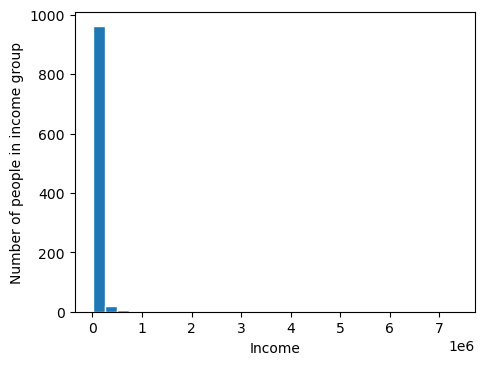

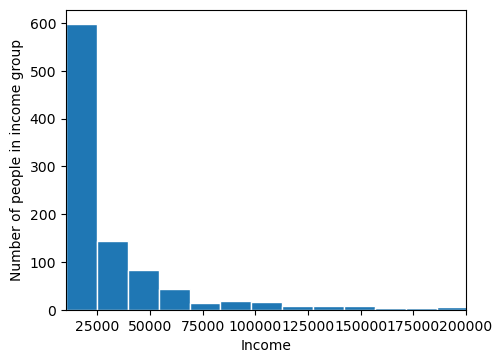

In [208]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1])

axes.hist(incomes, 30, edgecolor="w")
axes.set_xlabel("Income")
axes.set_ylabel("Number of people in income group");

fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1])

axes.hist(incomes, 500, edgecolor="w")
axes.set_xlim([10000,200000])
axes.set_xlabel("Income")
axes.set_ylabel("Number of people in income group");

# Log transformation

The function 𝑦=log(𝑥)
grows very very slowly. We can make 𝑥

HUGE and the log will just cram it way down to a small number.

Let's see this:

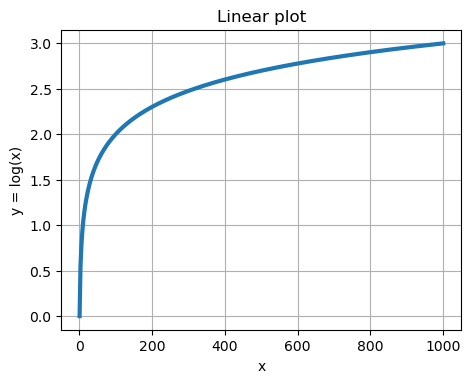

In [209]:
x = np.linspace(1,1000,400)
y = np.log10(x)


# plot it
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1])

axes.plot(x, y, '-', lw=3)
axes.grid(True,which="both",ls="-")
axes.set_xlabel("x")
axes.set_ylabel("y = log(x)")
axes.set_title("Linear plot");

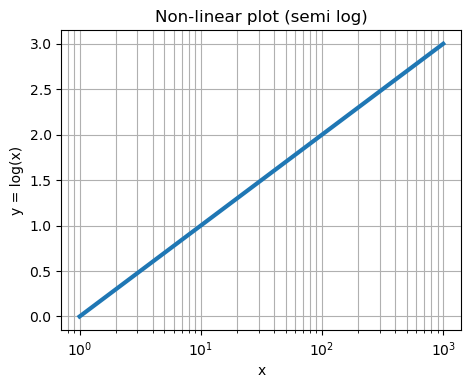

In [210]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1])

axes.semilogx(x, y, '-', lw=3)
axes.grid(True,which="both",ls="-")
axes.set_xlabel("x")
axes.set_ylabel("y = log(x)")
axes.set_title("Non-linear plot (semi log)");

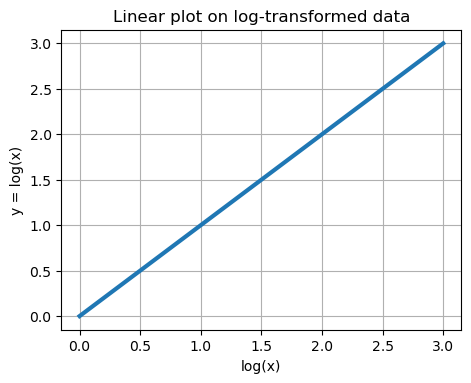

In [211]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1])

axes.plot(np.log10(x), y, '-', lw=3 )
axes.grid(True,which="both",ls="-")
axes.set_xlabel("log(x)")
axes.set_ylabel("y = log(x)")
axes.set_title("Linear plot on log-transformed data");

# Log transforming the income data

So what? Why is this helpful for our data?

The income data is too broad to see what is happening. The log is a squashing function.

We can log-transform the broad data to squash it down into a range where we can see what's going on!


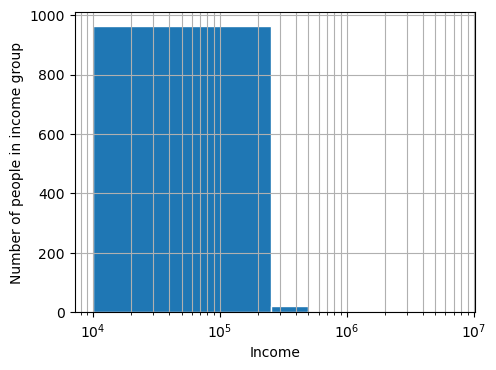

In [212]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1])

axes.hist(incomes, 30, edgecolor="w")
axes.set_xlabel("Income")
axes.set_ylabel("Number of people in income group");

axes.set_xscale('log') 
axes.grid(True,which="both",ls="-") # Shown for teaching
# The bins are NOT WELL plotted


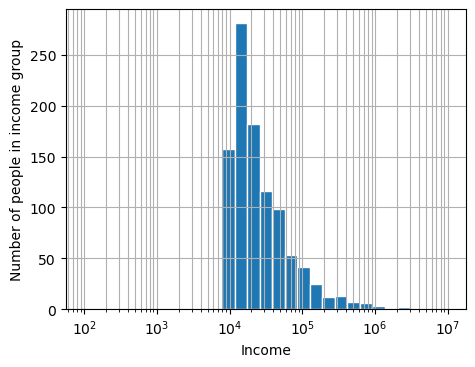

In [213]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1])

axes.hist(incomes,  bins=np.logspace(2, 7, 30), edgecolor="w")
axes.set_xlabel("Income")
axes.set_ylabel("Number of people in income group");
axes.set_xscale('log') 
axes.grid(True,which="both",ls="-") # Shown for teaching

Sometimes both your x- and your y-values are broadly distribued. We can also log-transform y.

If we plot a function $y=f(x)$ on a plot where both the x- and the y-scales are logarithmic and we see a **straight line** what kind of function is $f$?


Ans: power function.


$$y = a x^b$$

To see this take the log of both sides and replace $\log(y) \to y'$ and $\log(x) \to x'$.

$$
\log(y) = \log(a x^b) = \log(a) + \log(x^b) = a' + b \log(x)
$$

so

$$y' = a' + b x'$$

which is a straight line when we plot $x'$ vs. $y'$. The slope of the straight line is $b$, the exponent of $x$.

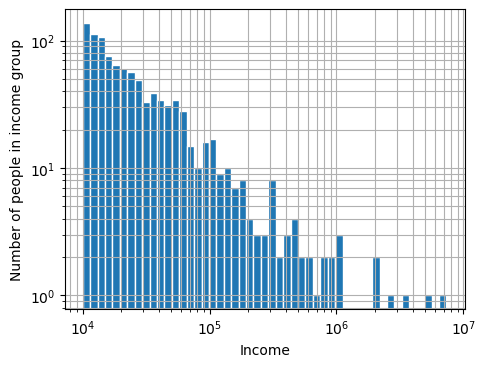

In [214]:
minx = min(incomes)
maxx = max(incomes)
num_bins = 50
logbins = np.logspace(np.log10(minx), np.log10(maxx), num_bins)

fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1])

axes.hist(incomes,  bins=logbins, edgecolor="w")
axes.set_xlabel("Income")
axes.set_ylabel("Number of people in income group");
axes.set_xscale('log') 
axes.set_yscale('log') 
axes.grid(True,which="both",ls="-") # Shown for teaching

 Let us now set density for true. 
    

# Exercises

Exponent: -2.1964753721998793


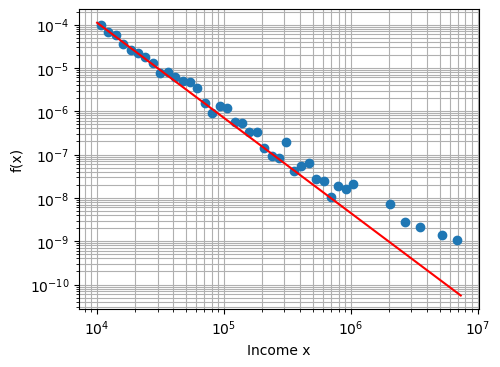

In [215]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1])

h, binedges = np.histogram(incomes,  bins=logbins, density=True) # We use np.histogram to make the binning calculations. Plotting is done with axes.plot below.
binmidpoints = (binedges[1:] + binedges[:-1]) / 2
axes.plot(binmidpoints, h, "o")
axes.set_xlabel("Income x")
axes.set_ylabel("f(x)");
axes.set_xscale('log') 
axes.set_yscale('log') 
axes.grid(True,which="both",ls="-") # Shown for teaching

# Linear Regression
def myExpFunc(x, a, b):
    return a * np.power(x, b)
popt, pcov = curve_fit(myExpFunc, binmidpoints, h)
print('Exponent:', popt[1])
_ = axes.plot(logbins, myExpFunc(logbins, *popt), 'r-')

Exponent: [159.69645418]


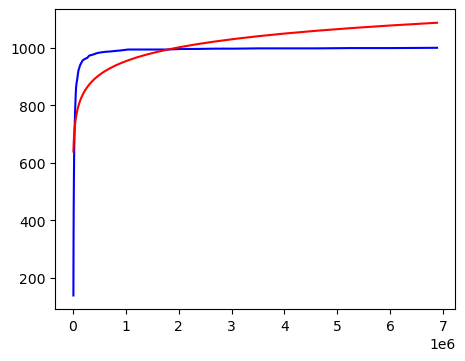

In [216]:
fig = plt.figure(figsize=(4, 3))
ax = fig.add_axes([0, 0, 1, 1])

hist, binedges = np.histogram(incomes, bins=logbins)
hist_cum = np.cumsum(hist)
binmidpoints = (binedges[1:] + binedges[:-1]) / 2

def myFunc(x, a):
    return a * np.log10(x)
popt, pcov = curve_fit(myFunc, binmidpoints, hist_cum, maxfev=4000)
print('Exponent:', popt)

ax.plot( binmidpoints, hist_cum, 'b-')
_ = ax.plot(binmidpoints, myFunc(logbins, popt[0])[:-1], 'r-')

# 3. Data relationships 
## Loading a mixed variable type data set

We investigate variuos data relationships in data. 

In [217]:
# Data set downloaded from: https://www.kaggle.com/mirichoi0218/insurance/downloads/insurance.zip/1
!head files/insurance.csv

age,sex,bmi,children,smoker,region,charges
19,female,27.9,0,yes,southwest,16884.924
18,male,33.77,1,no,southeast,1725.5523
28,male,33,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.47061
32,male,28.88,0,no,northwest,3866.8552
31,female,25.74,0,no,southeast,3756.6216
46,female,33.44,1,no,southeast,8240.5896
37,female,27.74,3,no,northwest,7281.5056
37,male,29.83,2,no,northeast,6406.4107


The data set contains demographic information about individuals, where they live (region), whether they smoke, and how much they pay for health insurance (charges).

We read the data as structured arrays using `numpy.genfromtxt` with `dtype=None`. `names=True` ensures we can access single columns using the header. More info: https://numpy.org/devdocs/user/basics.io.genfromtxt.html

In [218]:
datamixed = np.genfromtxt('files/insurance.csv', delimiter=',', dtype=None, names=True, encoding='utf8')
print(datamixed)
print(datamixed['smoker'])

[(19, 'female', 27.9 , 0, 'yes', 'southwest', 16884.924 )
 (18, 'male', 33.77, 1, 'no', 'southeast',  1725.5523)
 (28, 'male', 33.  , 3, 'no', 'southeast',  4449.462 ) ...
 (18, 'female', 36.85, 0, 'no', 'southeast',  1629.8335)
 (21, 'female', 25.8 , 0, 'no', 'southwest',  2007.945 )
 (61, 'female', 29.07, 0, 'yes', 'northwest', 29141.3603)]
['yes' 'no' 'no' ... 'no' 'no' 'yes']


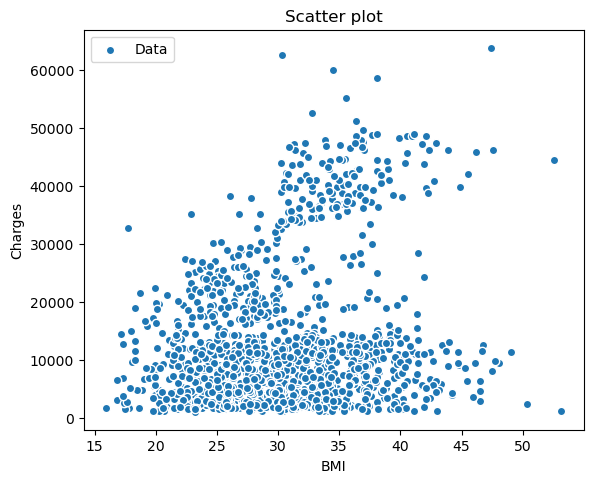

In [219]:
fig = plt.figure(figsize=(5, 4))
axes = fig.add_axes([0, 0, 1, 1])

# Plot data
axes.scatter(datamixed['bmi'], datamixed['charges'], label='Data', edgecolors='w');
axes.legend(loc='upper left'); axes.set_xlabel('BMI'); axes.set_ylabel('Charges'); axes.set_title('Scatter plot');

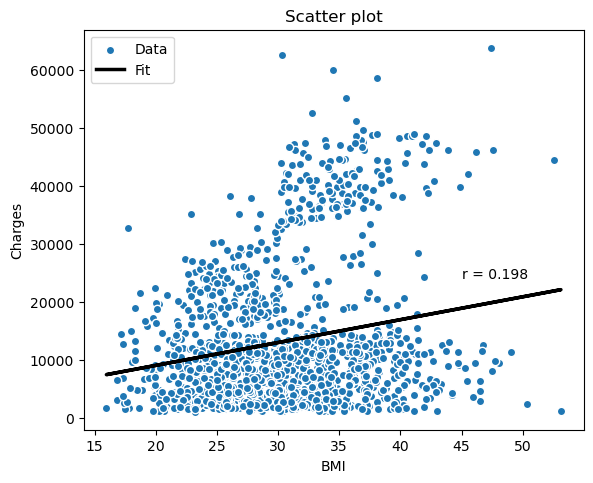

In [220]:
fig = plt.figure(figsize=(5, 4))
axes = fig.add_axes([0, 0, 1, 1])

# Plot data
axes.scatter(datamixed['bmi'], datamixed['charges'], label='Data', edgecolors='w');

# Plot fit
slope, intercept, r_value, _, _ = stats.linregress(datamixed['bmi'], datamixed['charges'])
line = slope * datamixed['bmi'] + intercept
axes.plot(datamixed['bmi'], line, linewidth=2.5, color='k', label='Fit')

axes.text(45, 24000, "r = " + str(round(r_value, 3)))
axes.legend(loc='upper left'); axes.set_xlabel('BMI'); axes.set_ylabel('Charges'); axes.set_title('Scatter plot');

The data points relate in a very weird way. Some stay on the bottom, some go up, and there is some "bottleneck" at BMI=30. Sure, we can fit a linear trend, but is it meaningful? We have to be careful.

Maybe adding information from a categorical variable clears things up:

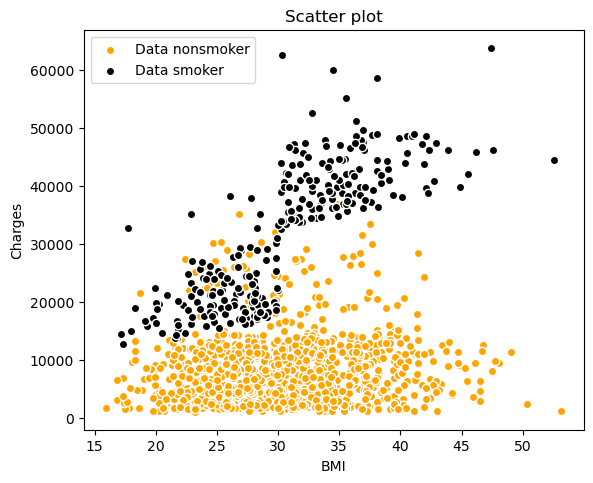

In [221]:
masksmoker = (datamixed['smoker'] == 'yes')  # Easy indexing: The power of numpy

fig = plt.figure(figsize=(5, 4))
axes = fig.add_axes([0, 0, 1, 1])

# Plot data
axes.scatter(datamixed['bmi'][~masksmoker], datamixed['charges'][~masksmoker], color='orange', label="Data nonsmoker", edgecolors='w');
axes.scatter(datamixed['bmi'][masksmoker], datamixed['charges'][masksmoker], color='k', label="Data smoker", edgecolors='w');

axes.legend(); axes.set_xlabel('BMI'); axes.set_ylabel('Charges'); axes.set_title('Scatter plot');

Aha! We have two sub-groups with different relations: Smokers and non-smokers are treated differently for insurance purposes. Next, let us do the linear regression on each of the sub-groups:

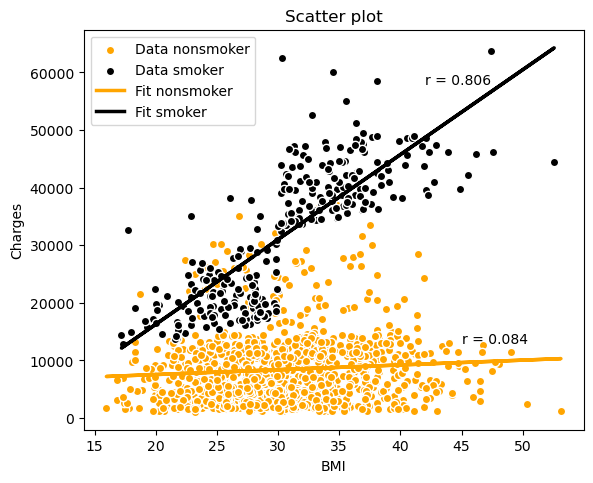

In [222]:
fig = plt.figure(figsize=(5, 4))
axes = fig.add_axes([0, 0, 1, 1])

# Plot data
axes.scatter(datamixed['bmi'][~masksmoker], datamixed['charges'][~masksmoker], color='orange', label="Data nonsmoker", edgecolors='w');
axes.scatter(datamixed['bmi'][masksmoker], datamixed['charges'][masksmoker], color='k', label="Data smoker", edgecolors='w');

# Plot fits
slope, intercept, r_value, _, _ = stats.linregress(datamixed['bmi'][~masksmoker], datamixed['charges'][~masksmoker])
axes.plot(datamixed['bmi'][~masksmoker], slope * datamixed['bmi'][~masksmoker] + intercept, linewidth=2.5, color='orange', label='Fit nonsmoker')
axes.text(45, 13000, "r = " + str(round(r_value, 3)))
slope, intercept, r_value, _, _ = stats.linregress(datamixed['bmi'][masksmoker], datamixed['charges'][masksmoker])
axes.plot(datamixed['bmi'][masksmoker], slope * datamixed['bmi'][masksmoker] + intercept, linewidth=2.5, color='k', label='Fit smoker')
axes.text(42, 58000, "r = " + str(round(r_value, 3)))

axes.legend(); axes.set_xlabel('BMI'); axes.set_ylabel('Charges'); axes.set_title('Scatter plot');

Our conclusion, if we stop here:
* **For non-smokers**: There is a very weak linear relation between BMI and charges. Apparently the insurance does not care too much about your BMI if you do not smoke
* **For smokers**: There seem to be 2 sub-groups of smokers treated differently by the insurance: Those with BMI below 30 and those with BMI above 30. The linear regression through both these groups shows that High-BMI smokers pay higher charges. This should not be the end of the analysis, however: Since we have two sub-groups, we have to question whether a linear regression through them is justified.

## Relating categorical and quantitative data

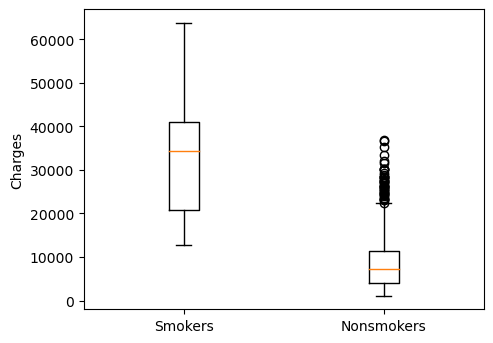

In [223]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.boxplot([datamixed['charges'][masksmoker], datamixed['charges'][~masksmoker]]);

axes.set_ylabel('Charges')
axes.set_xticklabels(['Smokers', 'Nonsmokers']);

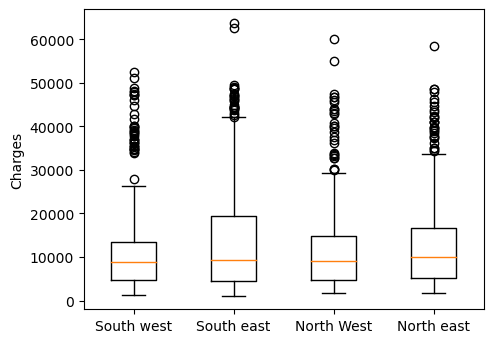

In [224]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.boxplot([datamixed['charges'][datamixed['region'] == 'southwest'],
              datamixed['charges'][datamixed['region'] == 'southeast'], 
              datamixed['charges'][datamixed['region'] == 'northwest'], 
              datamixed['charges'][datamixed['region'] == 'northeast']]);

axes.set_ylabel('Charges')
axes.set_xticklabels(['South west', 'South east', 'North West', 'North east']);

## Exercises

### Cutoff between smokers

In [225]:
smokers = datamixed[masksmoker]
results = {}

In [226]:
for cutoff in range(round(smokers['bmi'].min())+1, round(smokers['bmi'].max())):
    left = smokers[smokers['bmi'] < cutoff]['charges']
    right = smokers[smokers['bmi'] > cutoff]['charges']  
    result = stats.mannwhitneyu(left, right)
    results[cutoff] = result

In [227]:
y = []
for r in results.values():
    y.append(r.statistic)

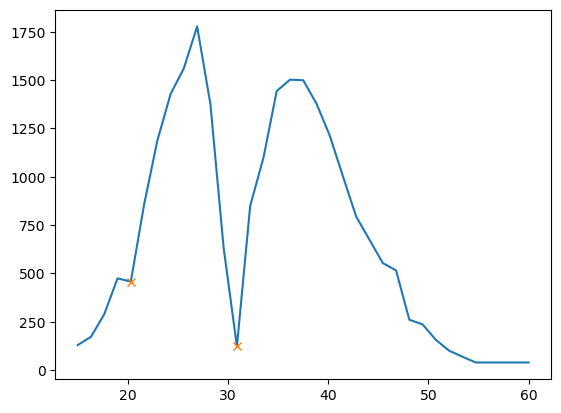

In [228]:
from scipy.signal import find_peaks

series = np.array(y)
x = np.linspace(15, 60, len(series))
mins, _ = find_peaks(series*-1)
plt.plot(x,y)
plt.plot(x[mins], series[mins], 'x', label='mins')

### Regression fits

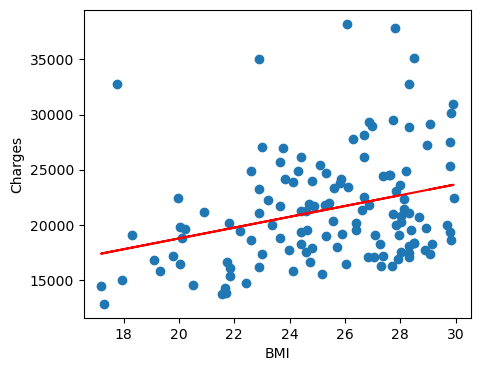

In [229]:
fig = plt.figure(figsize=(5, 4))

x = smokers[smokers['bmi']<30]['bmi']
y = smokers[smokers['bmi']<30]['charges']

plt.scatter(x, y, label = 'Data')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, 'r-', label = 'regression')
# plt.legend(loc='upper left')
plt.xlabel('BMI') 
plt.ylabel('Charges')
plt.show()

In [230]:
masksmoker_o30 = ((datamixed['bmi'] >= 30) & (datamixed['smoker'] == 'yes'))
masksmoker_u30 = ((datamixed['bmi'] < 30) & (datamixed['smoker'] == 'yes'))

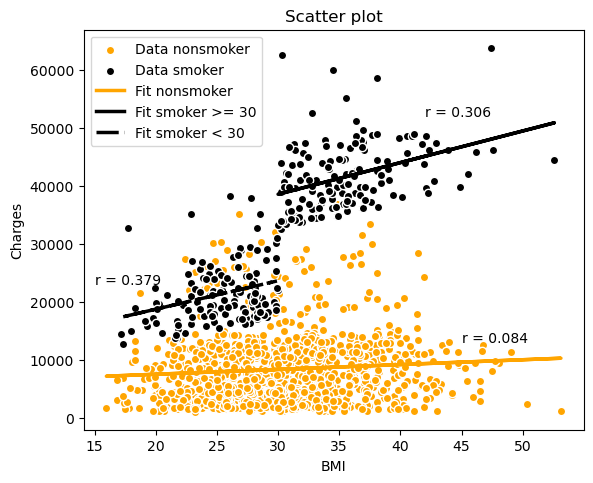

In [231]:
fig = plt.figure(figsize=(5, 4))
axes = fig.add_axes([0, 0, 1, 1])

# Plot data
axes.scatter(datamixed['bmi'][~masksmoker], datamixed['charges'][~masksmoker], color='orange', label="Data nonsmoker", edgecolors='w');
axes.scatter(datamixed['bmi'][masksmoker], datamixed['charges'][masksmoker], color='k', label="Data smoker", edgecolors='w');

# Plot fits
# nonsmokers
slope, intercept, r_value, _, _ = stats.linregress(datamixed['bmi'][~masksmoker], datamixed['charges'][~masksmoker])
axes.plot(datamixed['bmi'][~masksmoker], slope * datamixed['bmi'][~masksmoker] + intercept, linewidth=2.5, color='orange', label='Fit nonsmoker')
axes.text(45, 13000, "r = " + str(round(r_value, 3)))

# smokers > 30
slope, intercept, r_value, _, _ = stats.linregress(datamixed['bmi'][masksmoker_o30], datamixed['charges'][masksmoker_o30])
axes.plot(datamixed['bmi'][masksmoker_o30], slope * datamixed['bmi'][masksmoker_o30] + intercept, linewidth=2.5, color='k', label='Fit smoker >= 30')
axes.text(15, 23000, "r = " + str(round(r_value, 3)))

# smokers < 30
slope, intercept, r_value, _, _ = stats.linregress(datamixed['bmi'][masksmoker_u30], datamixed['charges'][masksmoker_u30])
axes.plot(datamixed['bmi'][masksmoker_u30], slope * datamixed['bmi'][masksmoker_u30] + intercept, linewidth=2.5, color='k', linestyle='-.', label='Fit smoker < 30')
axes.text(42, 52000, "r = " + str(round(r_value, 3)))

axes.legend(); axes.set_xlabel('BMI'); axes.set_ylabel('Charges'); _ = axes.set_title('Scatter plot')

### Barplot

In [232]:
smoker_o30_charges = datamixed['charges'][masksmoker_o30]
smoker_u30_charges = datamixed['charges'][masksmoker_u30]

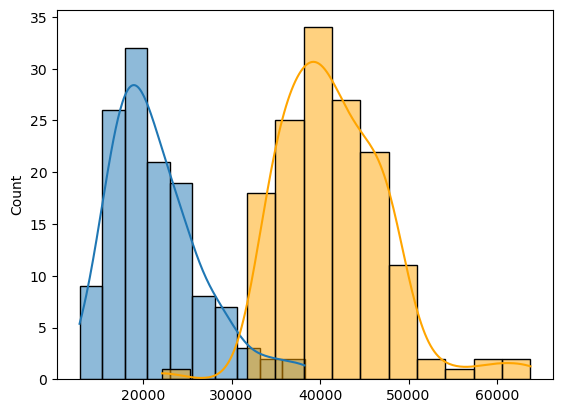

In [233]:
import seaborn as sns
sns.histplot(smoker_u30_charges, kde=True)
_ = sns.histplot(smoker_o30_charges, kde=True, color='orange')

Approximately normal distributions -> t-test

In [234]:
print('P-Value:',stats.ttest_ind(smoker_o30_charges, smoker_u30_charges).pvalue)
print('Estimate U30:', np.mean(smoker_u30_charges))
print('Estimate O30:', np.mean(smoker_o30_charges))
print('STD U30:', np.std(smoker_u30_charges))
print('STD O30:', np.std(smoker_o30_charges))

P-Value: 1.1464605609464152e-87
Estimate U30: 21363.217015968992
Estimate O30: 41557.98983986207
STD U30: 5047.103630834129
STD O30: 6010.639512331693


In [235]:
df_o30 = pd.DataFrame({'bmi': 'o30', 'charges': smoker_o30_charges})
df_u30 = pd.DataFrame({'bmi': 'u30', 'charges': smoker_u30_charges})
df = pd.concat([df_o30, df_u30], axis=0, join='outer')

In [236]:
df

,bmi,charges
0,o30,39611.75770
1,o30,36837.46700
2,o30,37701.87680
3,o30,38711.00000
4,o30,35585.57600
...,...,...
124,u30,16115.30450
125,u30,21472.47880
126,u30,18765.87545
127,u30,28101.33305


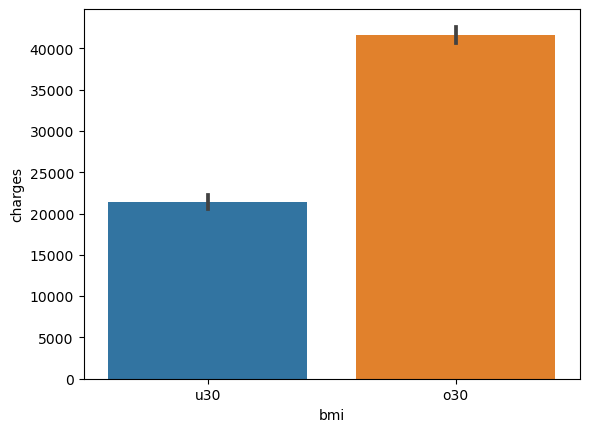

In [237]:
_ = sns.barplot(data=df, x=df.bmi, y=df.charges, order=['u30', 'o30'])

### ROC 

In [238]:
df_o30.bmi = 1
df_u30.bmi = 0

In [239]:
from sklearn.model_selection import train_test_split

X_train_o30, X_test_o30, y_train_o30, y_test_o30 = train_test_split(df_o30.charges, df_o30.bmi, test_size=0.2, random_state=42)
X_train_u30, X_test_u30, y_train_u30, y_test_u30 = train_test_split(df_u30.charges, df_u30.bmi, test_size=0.2, random_state=42)

In [240]:
X_train = np.array(pd.concat([X_train_o30, X_train_u30]))
X_test = np.array(pd.concat([X_test_o30, X_test_u30]))
y_train = np.array(pd.concat([y_train_o30, y_train_u30]))
y_test = np.array(pd.concat([y_test_o30, y_test_u30]))

In [241]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)
# decision tree
model3 = DecisionTreeClassifier()

# fit model
model1.fit(X_train.reshape(-1, 1), y_train.ravel())
model2.fit(X_train.reshape(-1, 1), y_train.ravel())
model3.fit(X_train.reshape(-1, 1), y_train.ravel())

# predict probabilities
pred_prob1 = model1.predict_proba(X_test.reshape(-1, 1))
pred_prob2 = model2.predict_proba(X_test.reshape(-1, 1))
pred_prob3 = model3.predict_proba(X_test.reshape(-1, 1))

# predictions 
pred1 = model1.predict(X_test.reshape(-1, 1))
pred2 = model2.predict(X_test.reshape(-1, 1))
pred3 = model3.predict(X_test.reshape(-1, 1))

/home/amelie/applications/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [242]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test.ravel(), pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test.ravel(), pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test.ravel(), pred_prob3[:,1], pos_label=1)

In [243]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])

print('AUC Linear Regression:', auc_score1)
print('AUC KNN:', auc_score2)
print('AUC Decision Tree:', auc_score3)

AUC Linear Regression: 1.0
AUC KNN: 1.0
AUC Decision Tree: 0.9827586206896552


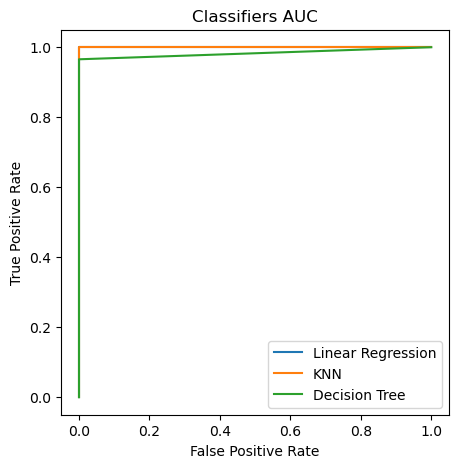

In [244]:
plt.subplots(1, figsize=(5,5))

plt.plot(fpr1, tpr1, label='Linear Regression')
plt.plot(fpr2, tpr2, label='KNN')
plt.plot(fpr3, tpr3, label='Decision Tree')

plt.title('Classifiers AUC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [245]:
scipy_U = stats.mannwhitneyu(y_test, pred1, alternative="two-sided", use_continuity=False)
print('Linear Regression')
print('Estimate:', auc_score1)
print('P-Value:', scipy_U.pvalue)
print('------')
scipy_U = stats.mannwhitneyu(y_test, pred2, alternative="two-sided", use_continuity=False)
print('KNN')
print('Estimate:', auc_score2)
print('P-Value:', scipy_U.pvalue)
print('------')
scipy_U = stats.mannwhitneyu(y_test, pred3, alternative="two-sided", use_continuity=False)
print('Decision Tree')
print('Estimate:', auc_score3)
print('P-Value:', scipy_U.pvalue)
print('------')

Linear Regression
Estimate: 1.0
P-Value: 6.305372947391355e-09
------
KNN
Estimate: 1.0
P-Value: 0.8493487951047682
------
Decision Tree
Estimate: 0.9827586206896552
P-Value: 0.8493487951047682
------
